Name: **Syed Farhan Naqvi**<br>
Div: **BE11-Q11**<br>
Roll no: **43344**<br>
Title: **Assignment 3: Build the Image classification model**<br>

In [1]:
#importing the libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd

In [2]:
#grabbing CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images.shape

(50000, 32, 32, 3)

In [3]:
test_images.shape

(10000, 32, 32, 3)

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

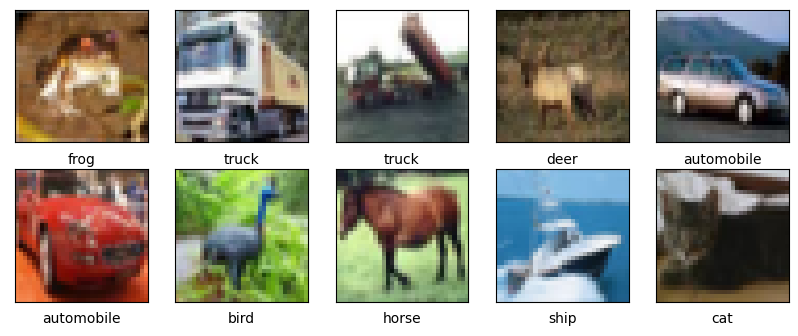

In [5]:
#showing images of mentioned categories
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [6]:
#building CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [7]:
#model compilation
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
epochs = 5
h = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 63s 36ms/step - loss: 1.5026 - accuracy: 0.4512 - val_loss: 1.3088 - val_accuracy: 0.5292
Epoch 2/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1398 - accuracy: 0.5961 - val_loss: 1.0706 - val_accuracy: 0.6239
Epoch 3/5
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9881 - accuracy: 0.6528 - val_loss: 0.9777 - val_accuracy: 0.6595
Epoch 4/5
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8949 - accuracy: 0.6888 - val_loss: 0.8901 - val_accuracy: 0.6866
Epoch 5/5
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8276 - accuracy: 0.7105 - val_loss: 0.8775 - val_accuracy: 0.6938


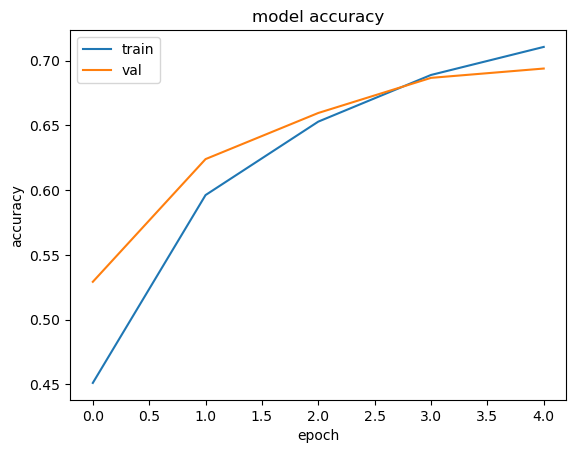

In [8]:
import keras
from matplotlib import pyplot as plt
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()